In [1]:
import pandas as pd
import csv
# for data visualisation and statistical analysis
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline 
#for warnings
import warnings  

In [2]:
df = pd.read_csv('car_price.csv',sep=',',error_bad_lines=False,warn_bad_lines=False)

In [3]:
df.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


#### Investigating the data sets

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216250 entries, 0 to 1216249
Data columns (total 9 columns):
Id         1216250 non-null int64
Price      1216250 non-null int64
Year       1216250 non-null int64
Mileage    1216250 non-null int64
City       1216250 non-null object
State      1216250 non-null object
Vin        1216250 non-null object
Make       1216250 non-null object
Model      1216250 non-null object
dtypes: int64(4), object(5)
memory usage: 83.5+ MB


In [4]:
df.rename(columns={'Year':'Year_model'},inplace=True)

In [5]:
df.dtypes

Id             int64
Price          int64
Year_model     int64
Mileage        int64
City          object
State         object
Vin           object
Make          object
Model         object
dtype: object

In [6]:
df.isnull().any()

Id            False
Price         False
Year_model    False
Mileage       False
City          False
State         False
Vin           False
Make          False
Model         False
dtype: bool

In [7]:
df.describe()

,Id,Price,Year_model,Mileage
count,1.216250e+06,1.216250e+06,1.216250e+06,1.216250e+06
mean,6.132814e+05,2.096887e+04,2.013307e+03,5.290810e+04
std,3.546571e+05,1.315940e+04,3.441842e+00,8.192775e+04
min,1.000000e+00,1.500000e+03,1.997000e+03,5.000000e+00
25%,3.081122e+05,1.299400e+04,2.012000e+03,2.396200e+04
50%,6.134915e+05,1.799500e+04,2.014000e+03,4.053400e+04
75%,9.175538e+05,2.641400e+04,2.016000e+03,7.272500e+04
max,1.233042e+06,4.995000e+05,2.018000e+03,7.758776e+07


### Data Exploration and visualisation

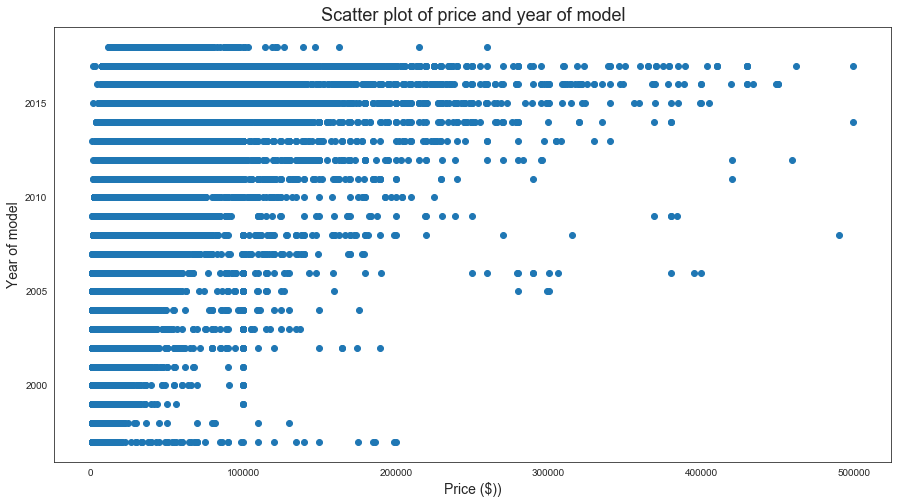

In [12]:
# here we visualize using scatter plot
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.Price, df.Year_model)
plt.xlabel("Price ($))", fontsize=14)
plt.ylabel("Year of model", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

#### We can easily say that prices increases with year recency. We can then say that there is a relationship between year of model and prices


> We will now go ahead to investigate the make of cars and prices

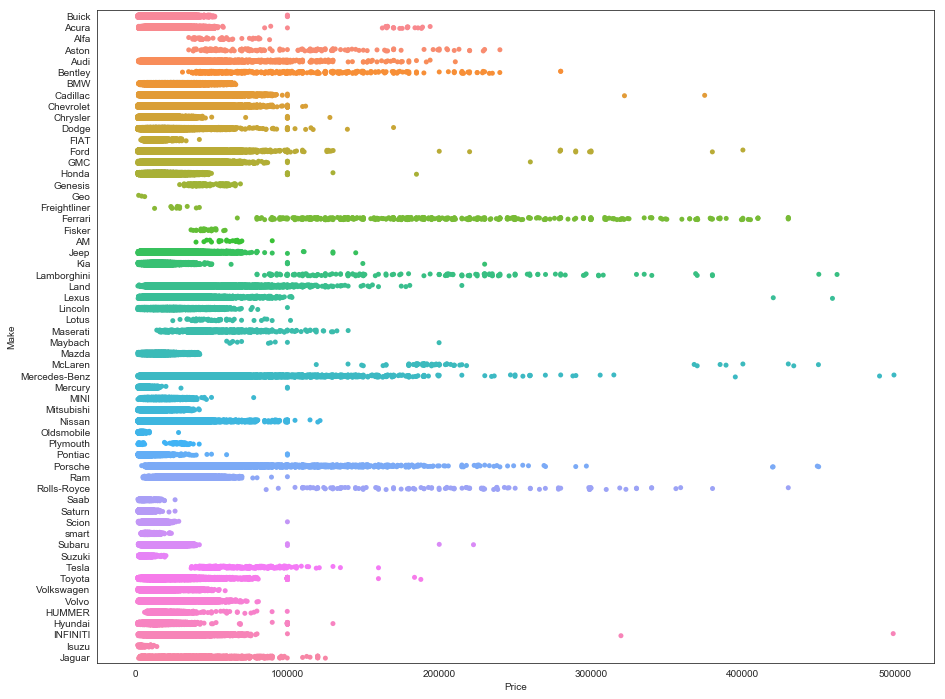

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x='Price', y='Make', jitter=.1)
plt.show()

We can easily conclude from the plot above between the Make and the prices, that more sophisticated cars are more price distributed, hence, the those makes tend to vary their prices.

While the popular cars like Ford,Toyota,Acura,Chevrolet etc, are leass price distributed.

In [14]:
len(df.Make.unique())

58

In [18]:
len(df.Model.unique())

3105

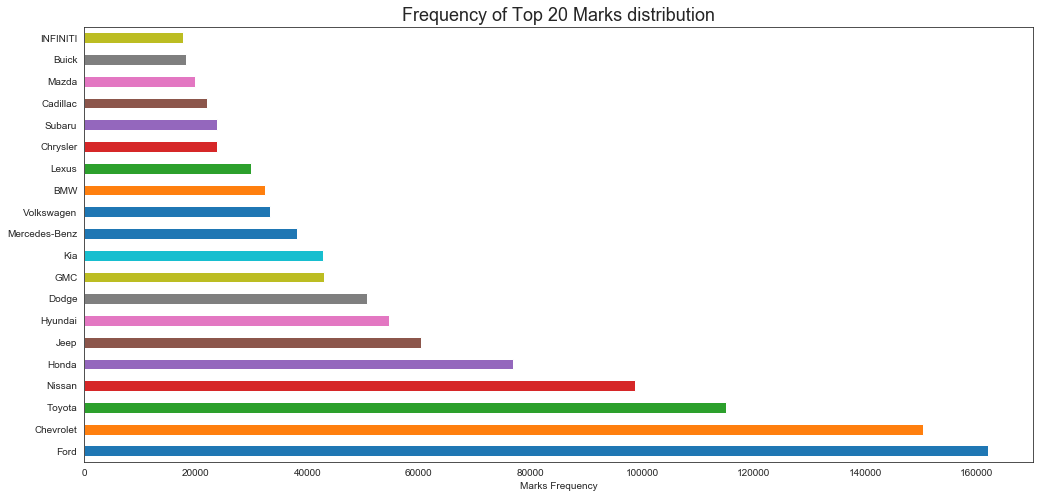

In [19]:
plt.figure(figsize=(17,8))
df.Make.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Marks Frequency')
plt.title("Frequency of Top 20 Marks distribution",fontsize=18)
plt.show()

We are going to create a correlation between the data sets

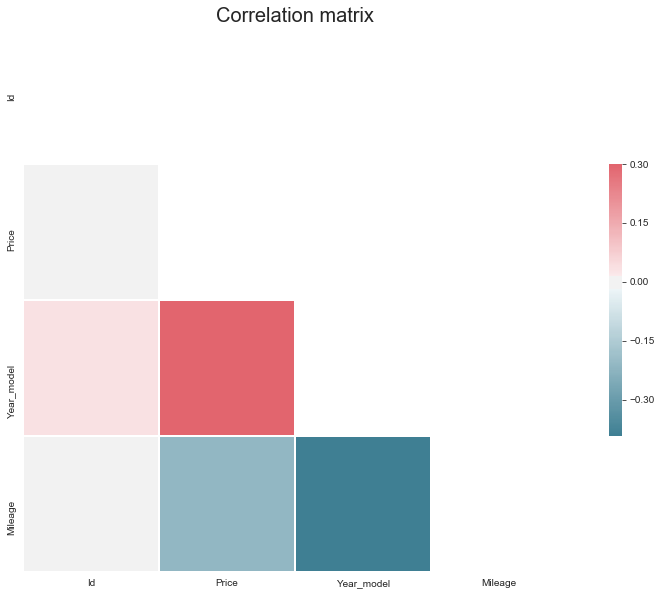

In [17]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = df.corr()
#print(corr)
#For the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

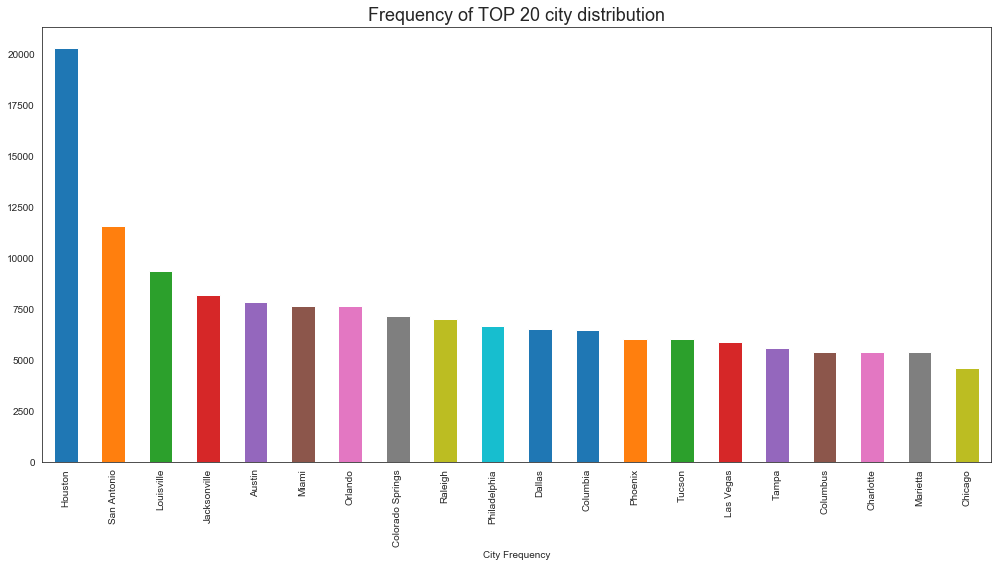

In [49]:
plt.figure(figsize=(17,8))
df.City.value_counts().nlargest(20).plot(kind='bar')
plt.xlabel('City Frequency')
plt.title("Frequency of TOP 20 city distribution",fontsize=18)
plt.show()

Houston seems to be the most popular city.

##### Now let's start modelling

### Data Modelling

In [50]:
#We would look at 4 models and pick the best

In [10]:
#Best K Nearest Neighbours
data  = df.sample(n=6000,  random_state=1111)

In [61]:
data.to_csv('data.csv')

In [11]:
data.tail()

,Id,Price,Year_model,Mileage,City,State,Vin,Make,Model
1060738,1066106,13295,2013,99261,Augusta,GA,JN8AF5MR2DT200718,Nissan,JUKESV
812519,817886,5995,2012,97141,St. Augustine,FL,KMHCT4AEXCU243457,Hyundai,Accent4dr
965226,970594,13990,2009,52196,Virginia Beach,VA,WDDGF81X99F213908,Mercedes-Benz,C-Class4dr
388993,394360,14000,2013,42932,Tampa,Fl,KM8JUCAC4DU692552,Hyundai,TucsonGLS
406716,412083,13781,2015,47744,Florence,KY,1C4NJPBB9FD387885,Jeep,PatriotSport


In [12]:
print(len(data))
print(len(df))

6000
1216250


In [13]:
data.drop(['Vin','Model','State','City'],axis=1,inplace=True)

In [14]:
data.shape

(6000, 5)

We will get our categorical features and preprocess them to be numerical

In [16]:
X = data[['Year_model', 'Mileage', 'Make']]
Y = data.Price
X = pd.get_dummies(X)

In [17]:
X.head()

,Year_model,Mileage,Make_Acura,Make_Aston,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
613273,2012,129829,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
624810,2014,86697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960824,2013,90234,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974470,2016,16751,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198797,2015,55267,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# now we use the train_test_split function already available in sklearn library to split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

C:\Users\LEENDAH\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


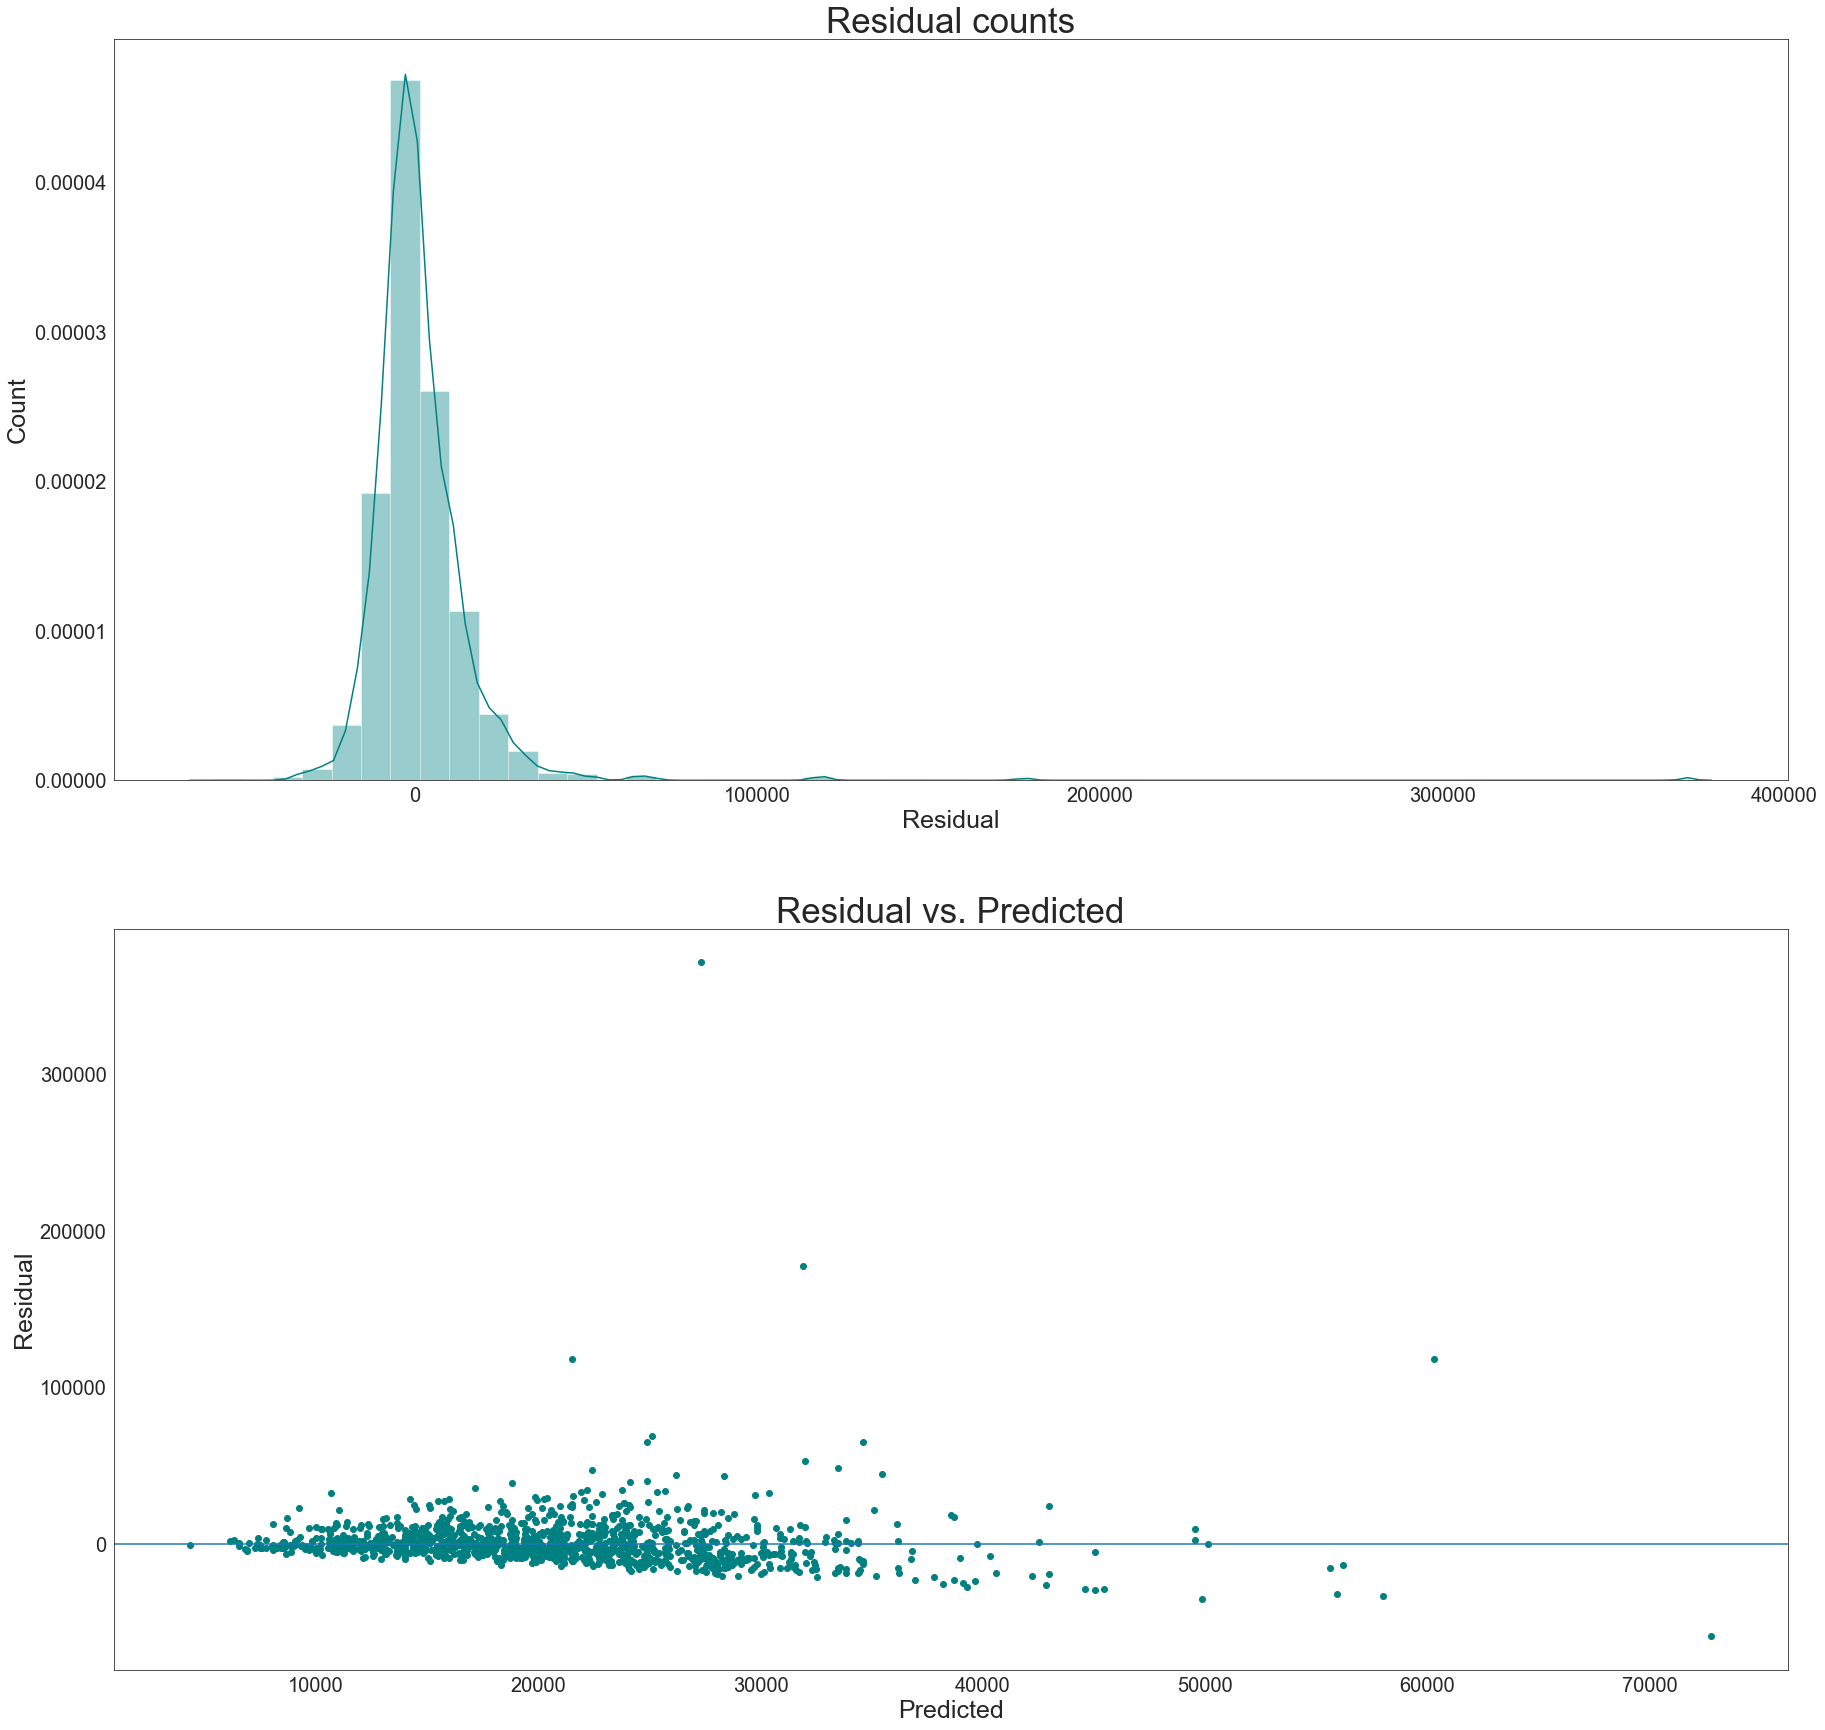

RMSE:
17258.694871667827


In [19]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [20]:
#To validate the score
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.10


#### Using Decision Trees

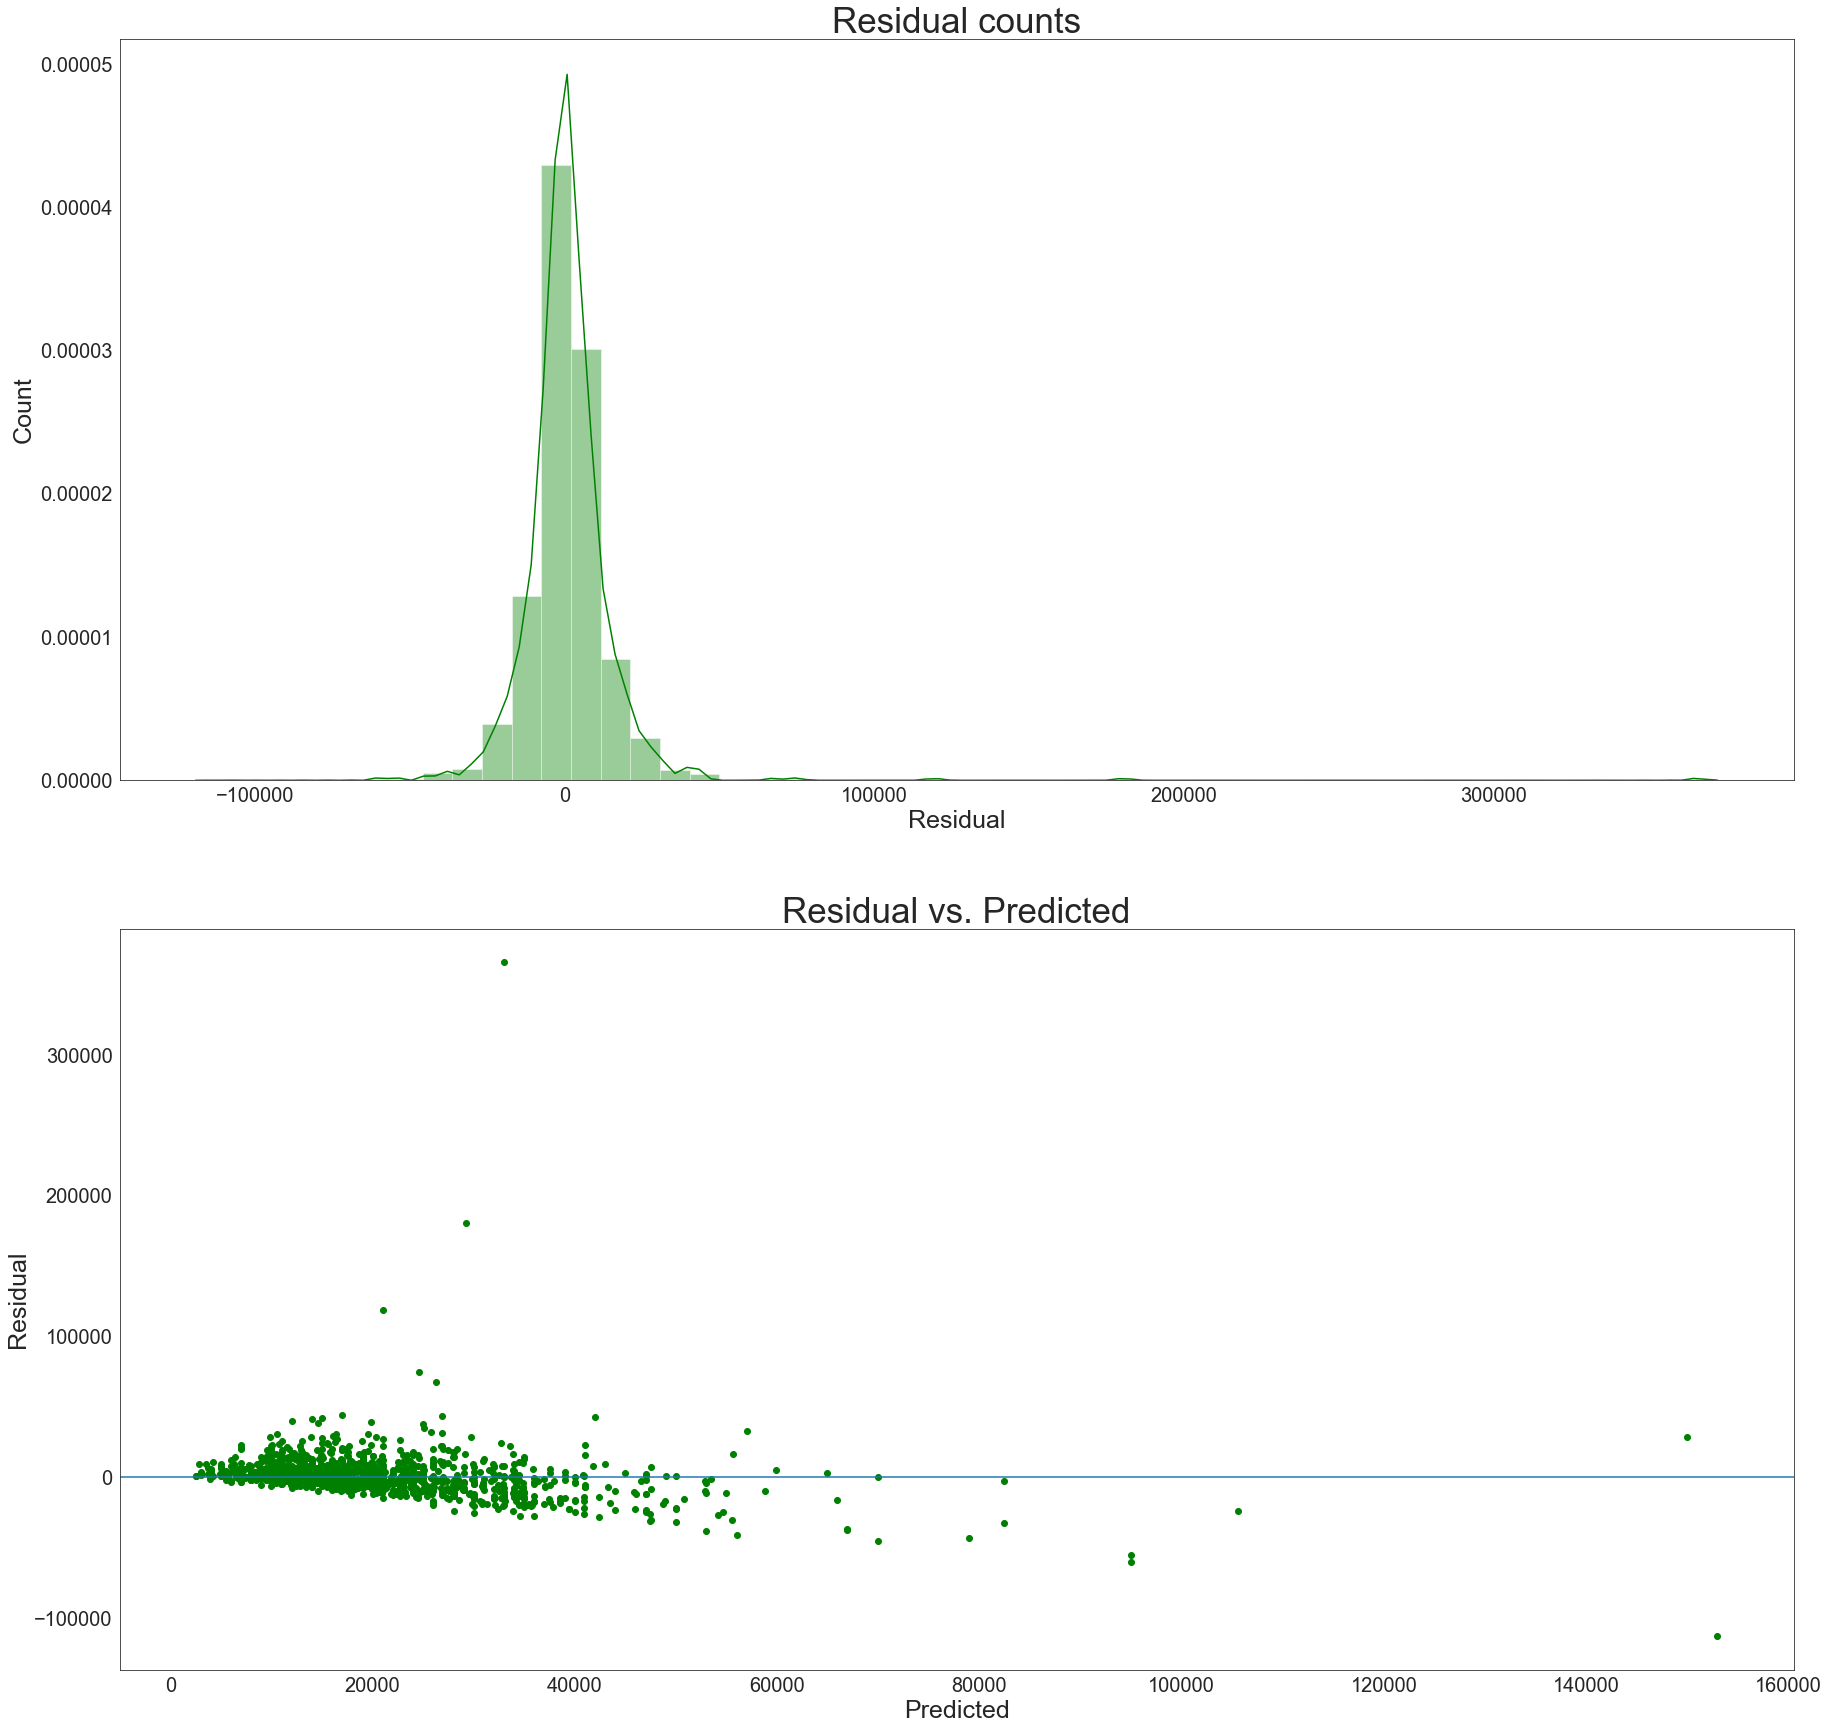

RMSE:
17226.343796929166


In [21]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='green')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='green')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [22]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.11


### Using Linear Regression

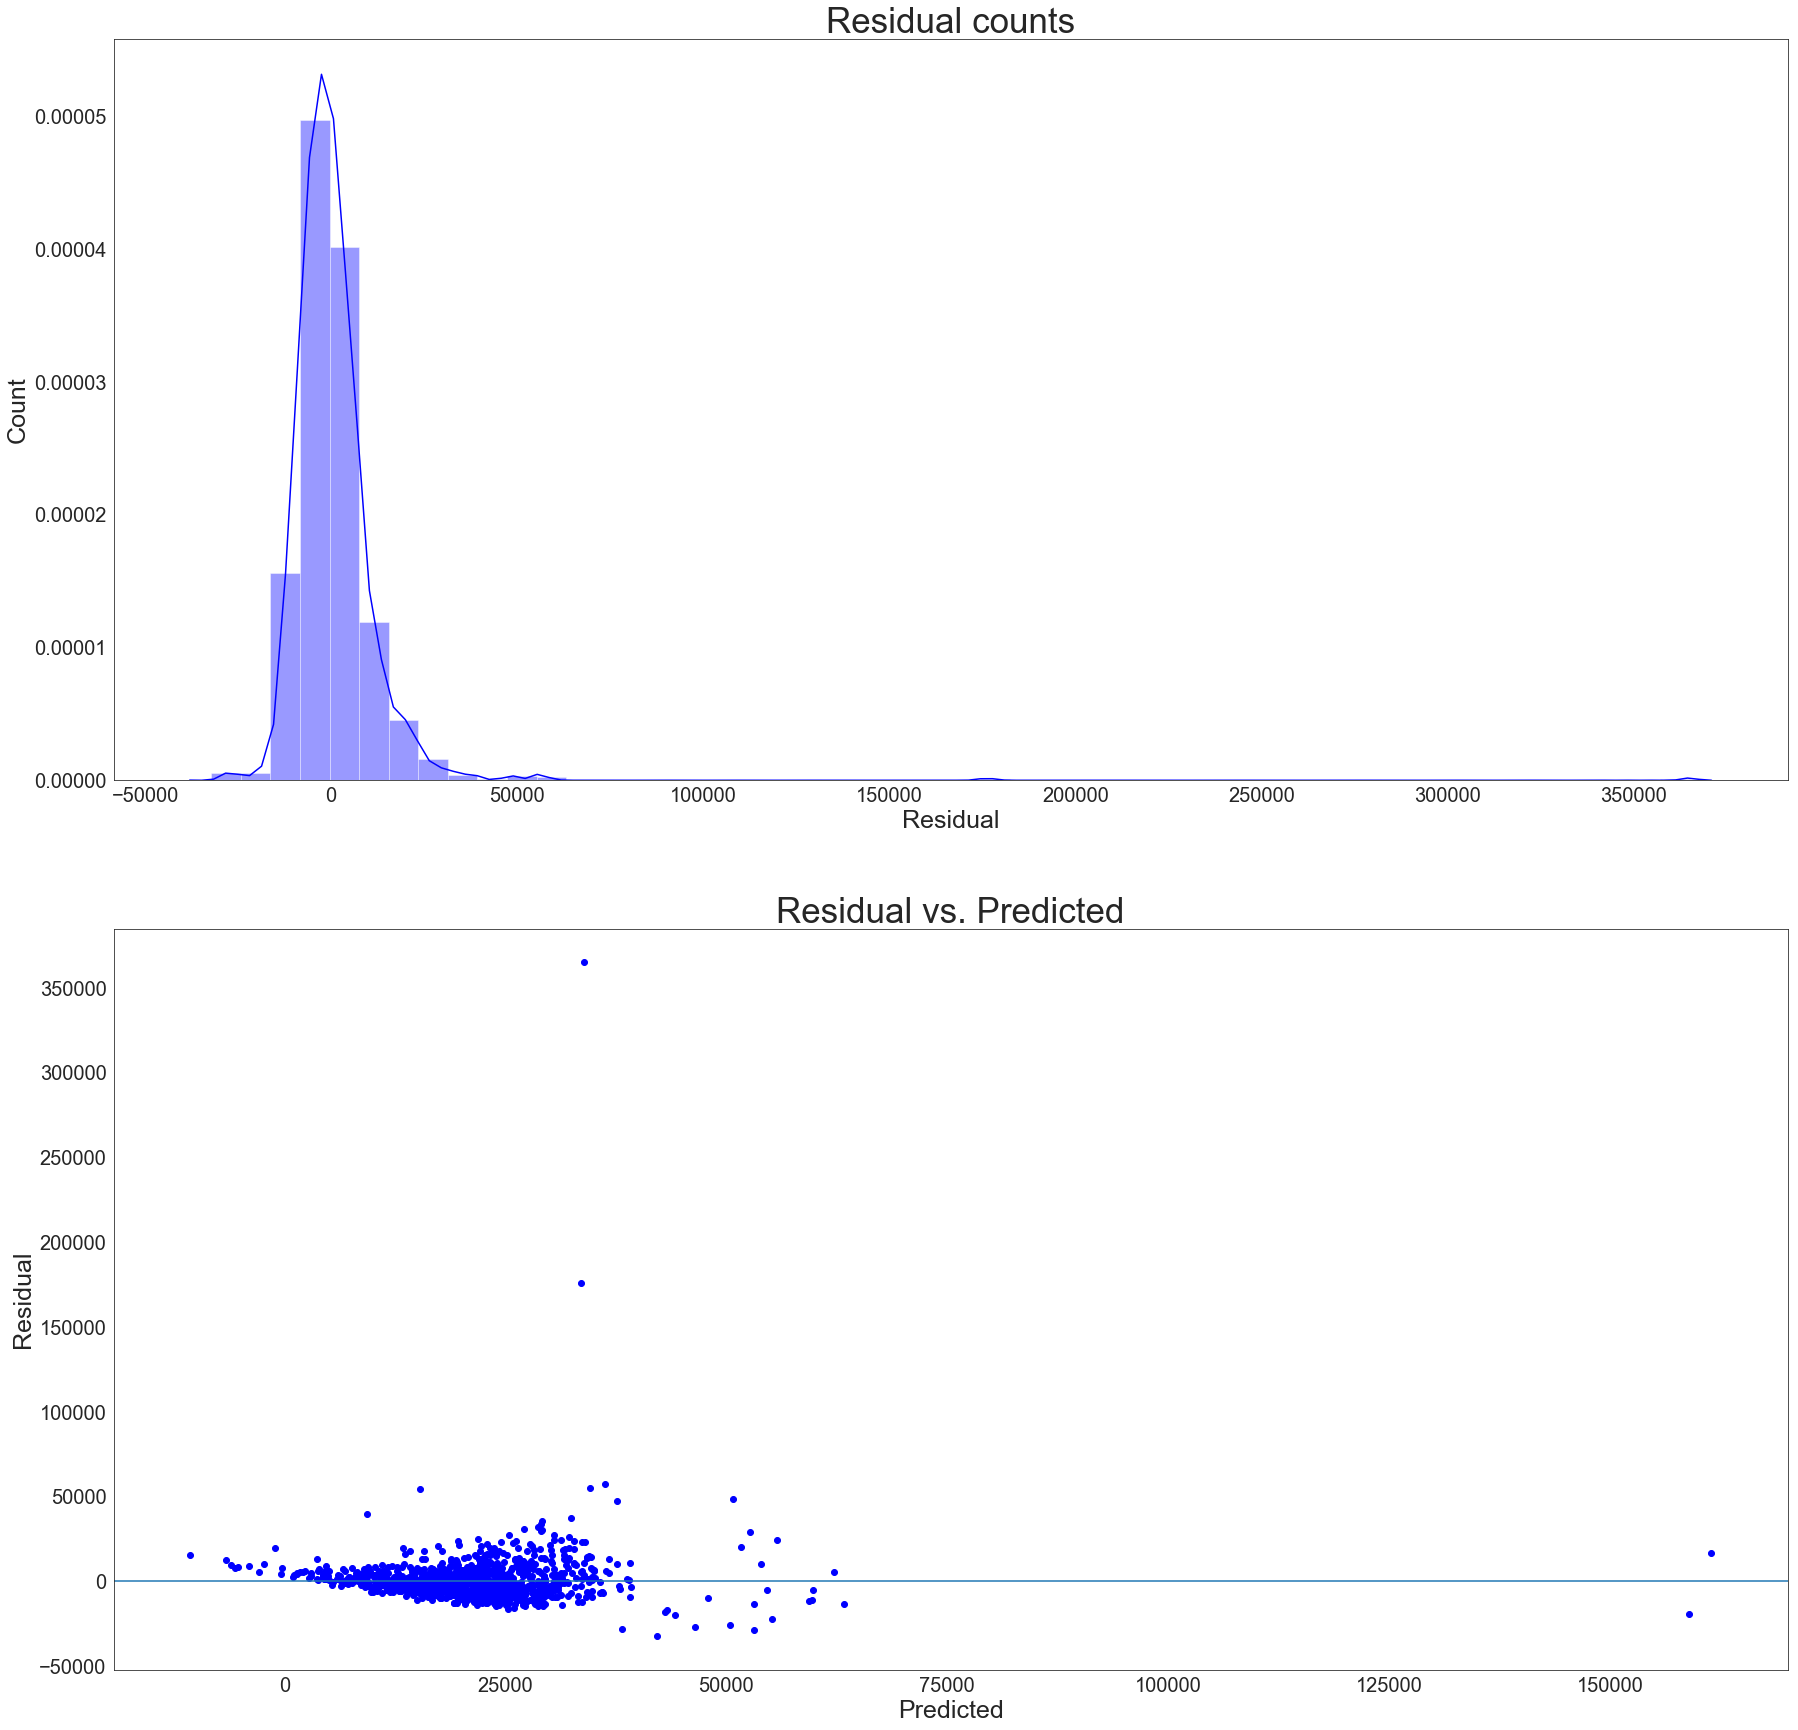

RMSE:
14828.218866527557


In [23]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='blue')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='blue')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [24]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.34


Next we would try to boost our model using <b> Boosting </b>

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=12).mean())

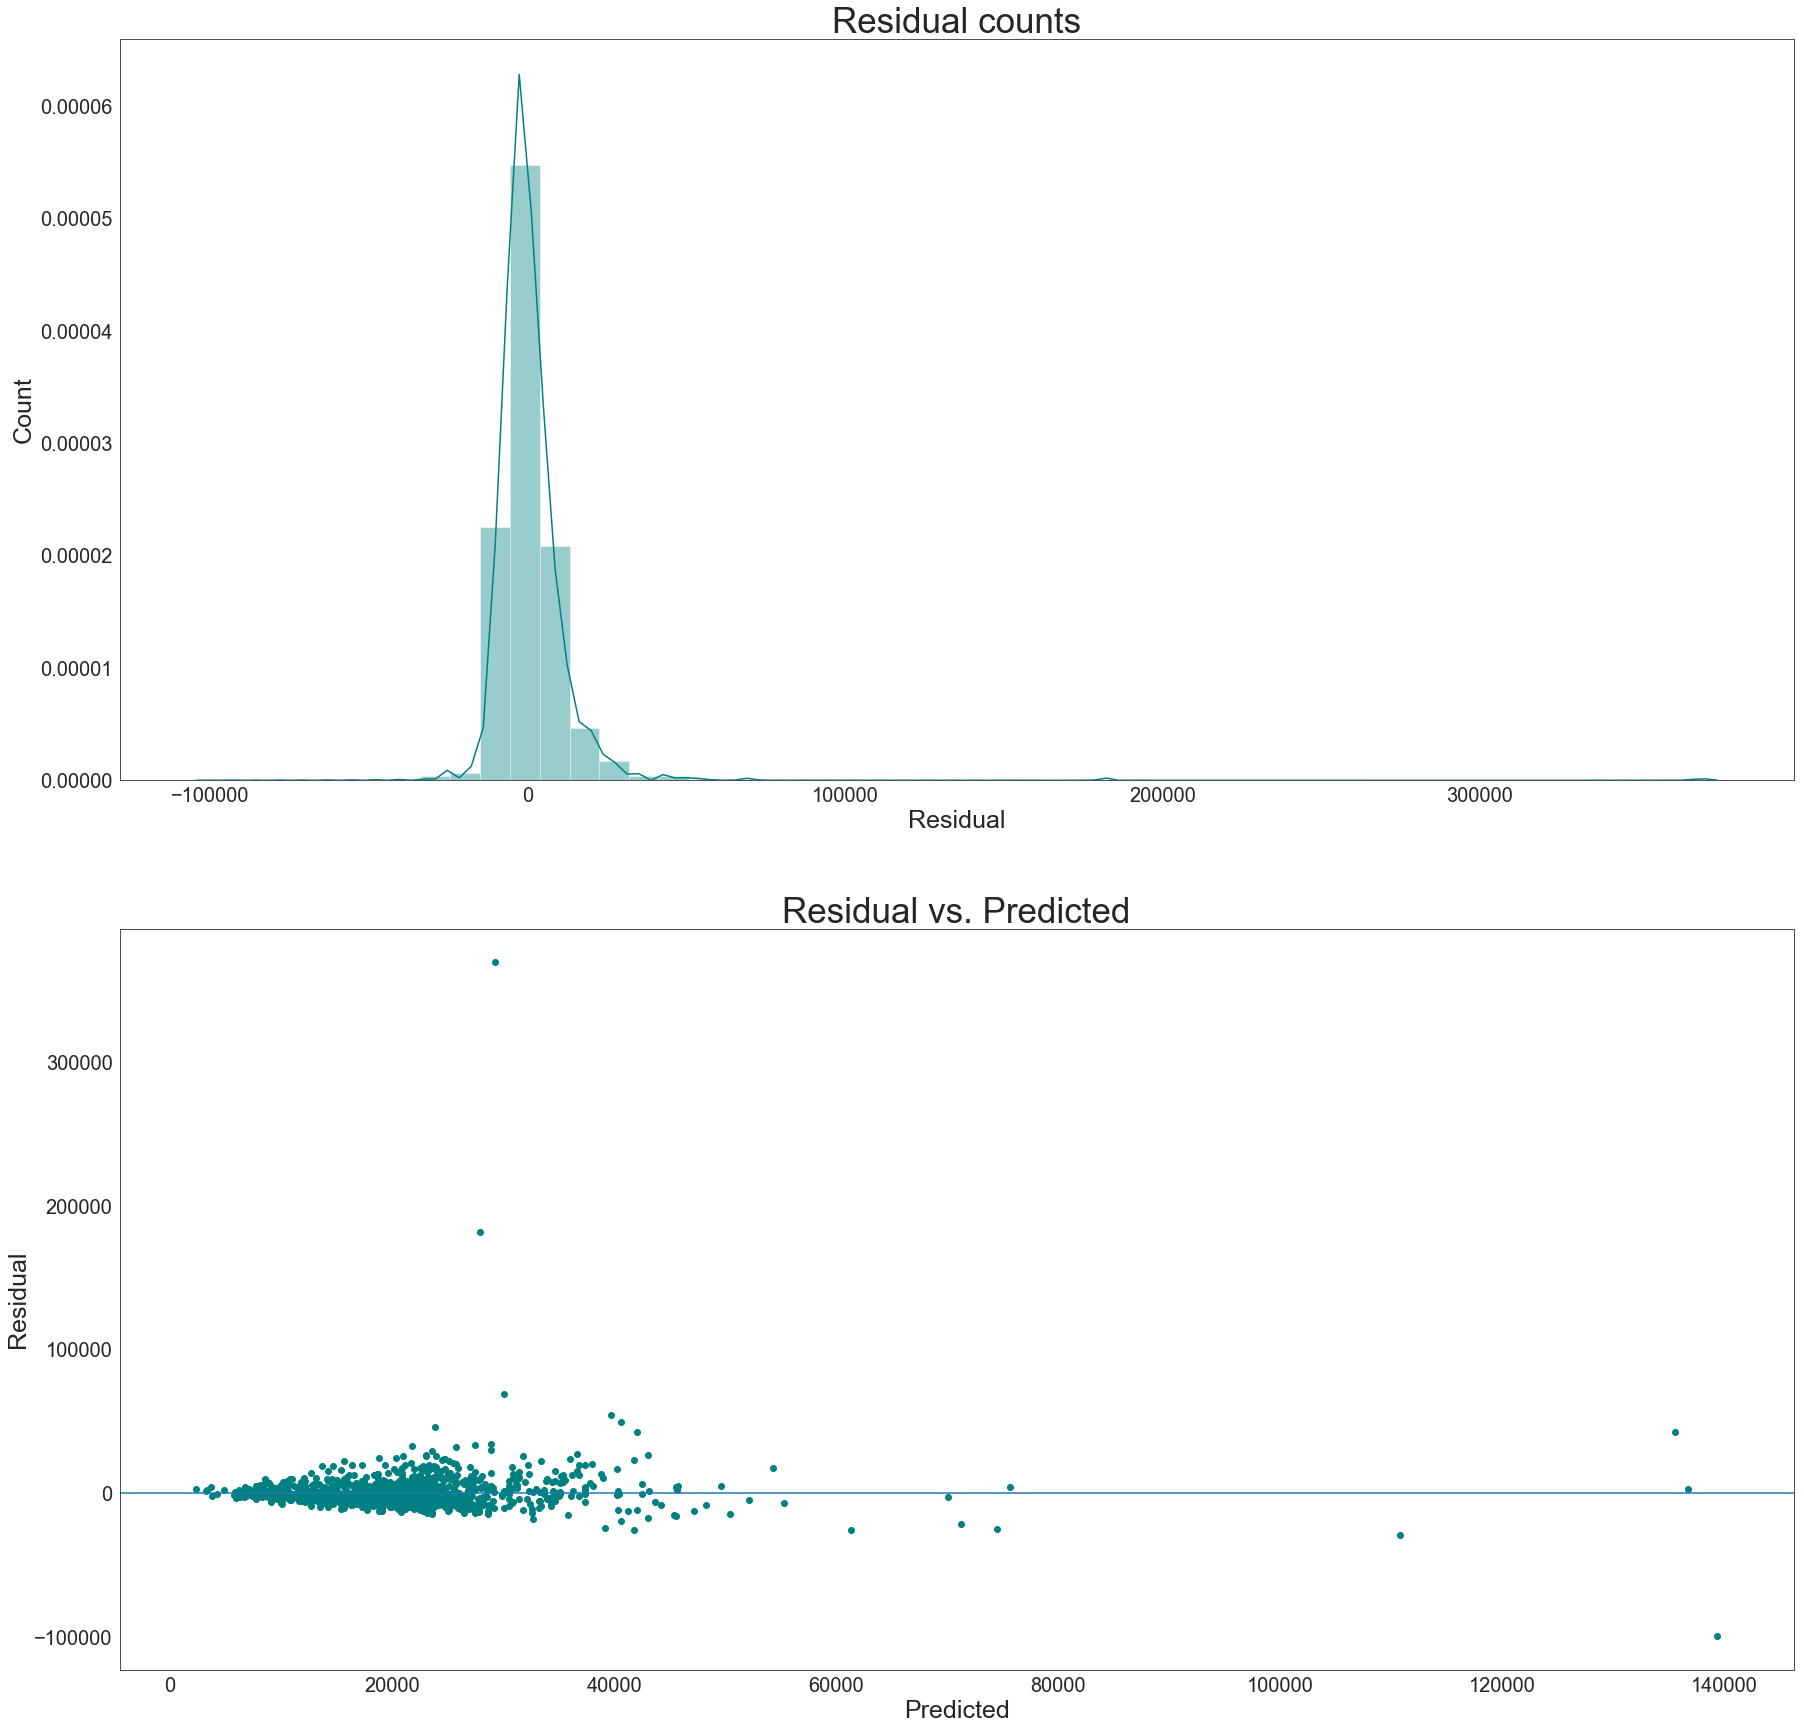


Cross Validation Scores:
[0.50845543 0.60453007 0.51629391 0.43421639 0.41172131 0.22364097
 0.58301003 0.45334819 0.34027267 0.52162866 0.30756743 0.6844823 ]

Mean Score:
0.4657639466912908

RMSE:
15014.768011273627


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [ ]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

#### Model Evaluation
It appears that the Gradient Boosting model regressor win the battle with the lowest RMSE value and the highest R^2 score. In the following table we will do a benchmarking resuming all the models tested above.

Since the Gradient Boosting regressor is the highest, we will now inspect its coeficients and interceptors.

In [54]:
# user_input = [2010, 124999.5, 'Diesel', 'BMW']
user_input = {'Year_model':2016, 'Mileage':82499.5, 'Make':'Mercedes-Benz'}
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(49)
    # set the numerical input as they are
    enc_input[0] = data['Year_model']
    enc_input[1] = data['Mileage']
    #enc_input[2] = data_car['City']
    ##################### Mark #########################
    # get the array of marks categories
    marks = df.Make.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'Make_'+data['Make']
    # search for the index in columns name list 
    mark_column_index = X.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[mark_column_index] = 1
    #####################City ####################
    # get the array of fuel type
#     city_types = df.City.unique()
#     # redefine the the user inout to match the column name
#     redefinded_user_input = 'City'+data_car['City']
#     # search for the index in columns name list 
#     City_column_index = X.columns.tolist().index(redefinded_user_input)
#     # fullfill the found index with 1
#     enc_input[City_column_index] = 1
    return enc_input

In [55]:
print(input_to_one_hot(user_input))

[2.01600e+03 8.24995e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00]


In [56]:
a = input_to_one_hot(user_input)

In [57]:
price_pred = gbr.predict([a])

In [58]:
price_pred[0]

33752.62875547141

Saving the best model

In [45]:
from sklearn.externals import joblib

joblib.dump(gbr, 'model.pkl')

['model.pkl']

In [46]:
gbr = joblib.load('model.pkl')

In [59]:
print("The best price for this Mercedes-Benz  is",gbr.predict([a])[0])

('The best price for this Mercedes-Benz  is', 33752.62875547141)


In [60]:
lr = joblib.load('model.pkl')

# Saving the data columns from training
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Models columns dumped!")

Models columns dumped!
